# 1.Download Datasete on Kaggle

In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"maryamom123","key":"6fce7b555cc605c3390dc8dcec541300"}'}

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download maryamom123/datasetflower

100% 85.8M/85.8M [00:03<00:00, 33.9MB/s]
100% 85.8M/85.8M [00:03<00:00, 25.4MB/s]


In [5]:
!unzip /content/datasetflower.zip

Archive:  /content/datasetflower.zip
  inflating: dataset/cat_to_name.json  
  inflating: dataset/test/image_00005.jpg  
  inflating: dataset/test/image_00006.jpg  
  inflating: dataset/test/image_00024.jpg  
  inflating: dataset/test/image_00025.jpg  
  inflating: dataset/test/image_00029.jpg  
  inflating: dataset/test/image_00050.jpg  
  inflating: dataset/test/image_00060.jpg  
  inflating: dataset/test/image_00065.jpg  
  inflating: dataset/test/image_00092.jpg  
  inflating: dataset/test/image_00099.jpg  
  inflating: dataset/test/image_00114.jpg  
  inflating: dataset/test/image_00116.jpg  
  inflating: dataset/test/image_00132.jpg  
  inflating: dataset/test/image_00176.jpg  
  inflating: dataset/test/image_00177.jpg  
  inflating: dataset/test/image_00187.jpg  
  inflating: dataset/test/image_00191.jpg  
  inflating: dataset/test/image_00202.jpg  
  inflating: dataset/test/image_00203.jpg  
  inflating: dataset/test/image_00204.jpg  
  inflating: dataset/test/image_00212.jpg  

In [6]:
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
from skimage.io import imread
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from skimage.color import rgb2gray, rgba2rgb
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf
import pandas as pd
import numpy as np
import datetime
import time
import random
import os
import cv2

%reload_ext tensorboard

# Preparing & Preprocessing Images

In [7]:
dataset_dir = '/content/dataset'

folderMap = {
    0: 'bird of paradise', 1: 'colts foot', 2: 'purple coneflower', 3: 'peruvian lily', 4: 'fritillary', 5: 'stemless gentian', 6:'artichoke', 7: 'sweet william', 8: 'cape flower', 
    9: 'barbeton daisy', 10: 'poinsettia', 11: 'common dandelion', 12: 'wild pansy', 13: 'pelargonium', 14: 'bishop of llandaff'}

In [8]:
valid = os.path.join(dataset_dir, 'valid')
Train = os.path.join(dataset_dir, 'train')

In [9]:
num_classes = len(os.listdir(Train))
num_classes

15

In [47]:
images = []
labels = []
labels_idx = []

for label in os.listdir(Train):
    images_for_label = os.path.join(Train, label)
    for image in os.listdir(images_for_label):
        image = plt.imread(os.path.join(images_for_label, image))
        image = cv2.resize(image, (32, 32))
        images.append(image)
        labels.append(folderMap[int(label)])
        labels_idx.append(label)

In [48]:
images = np.array(images)
labels = np.array(labels)
labels_idx = np.array(labels_idx, dtype='int32')

images.shape

(1068, 32, 32, 3)

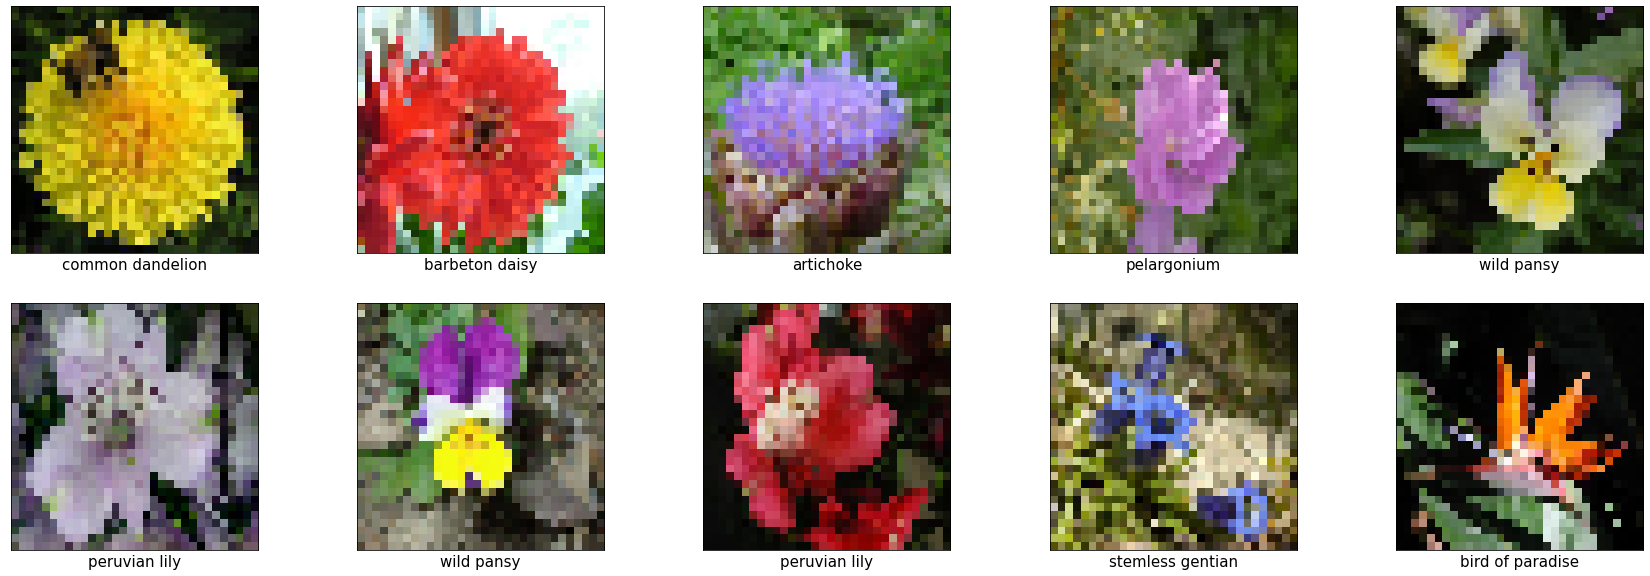

In [49]:
fig = plt.figure(figsize=(30, 10))
for i in range(10):
    random_num = np.random.randint(0, 1068)
    ax = fig.add_subplot(2, 5, i+1)
    plt.axis()
    plt.xticks([])
    plt.yticks([])
    ax.set_xlabel(xlabel = labels[random_num], fontsize=15)
    ax.imshow(images[random_num])

In [10]:
import json
with open('/content/dataset/cat_to_name.json') as f:
    cat_to_name = json.load(f)
    print(json.dumps(cat_to_name, indent=4))

# class_names are inferred labels from folder names of type string (e.g. '0')
# the internal integer label values are different from the values in the JSON
# so these functions are necessary

# convert internal tag integer to readable flower name
def flower_name(val):
    return cat_to_name[train_ds.class_names[val]]

# convert label from CSV to internal label value
def to_internal_tag(name_tag):
    return train_ds.class_names.index(str(name_tag))

{
    "0": "bird of paradise",
    "1": "colt's foot",
    "2": "purple coneflower",
    "3": "peruvian lily",
    "4": "fritillary",
    "5": "stemless gentian",
    "6": "artichoke",
    "7": "sweet william",
    "8": "cape flower",
    "9": "barbeton daisy",
    "10": "poinsettia",
    "11": "common dandelion",
    "12": "wild pansy",
    "13": "pelargonium",
    "14": "bishop of llandaff"
}


# Splitting Sataset

In [50]:
X_train, X_test, y_train, y_test = train_test_split(images, labels_idx, random_state=1, stratify=labels_idx, shuffle=True,test_size=0.1)

In [51]:
print("Training: ", len(X_train))
print("Test: ", len(X_test))

Training:  961
Test:  107


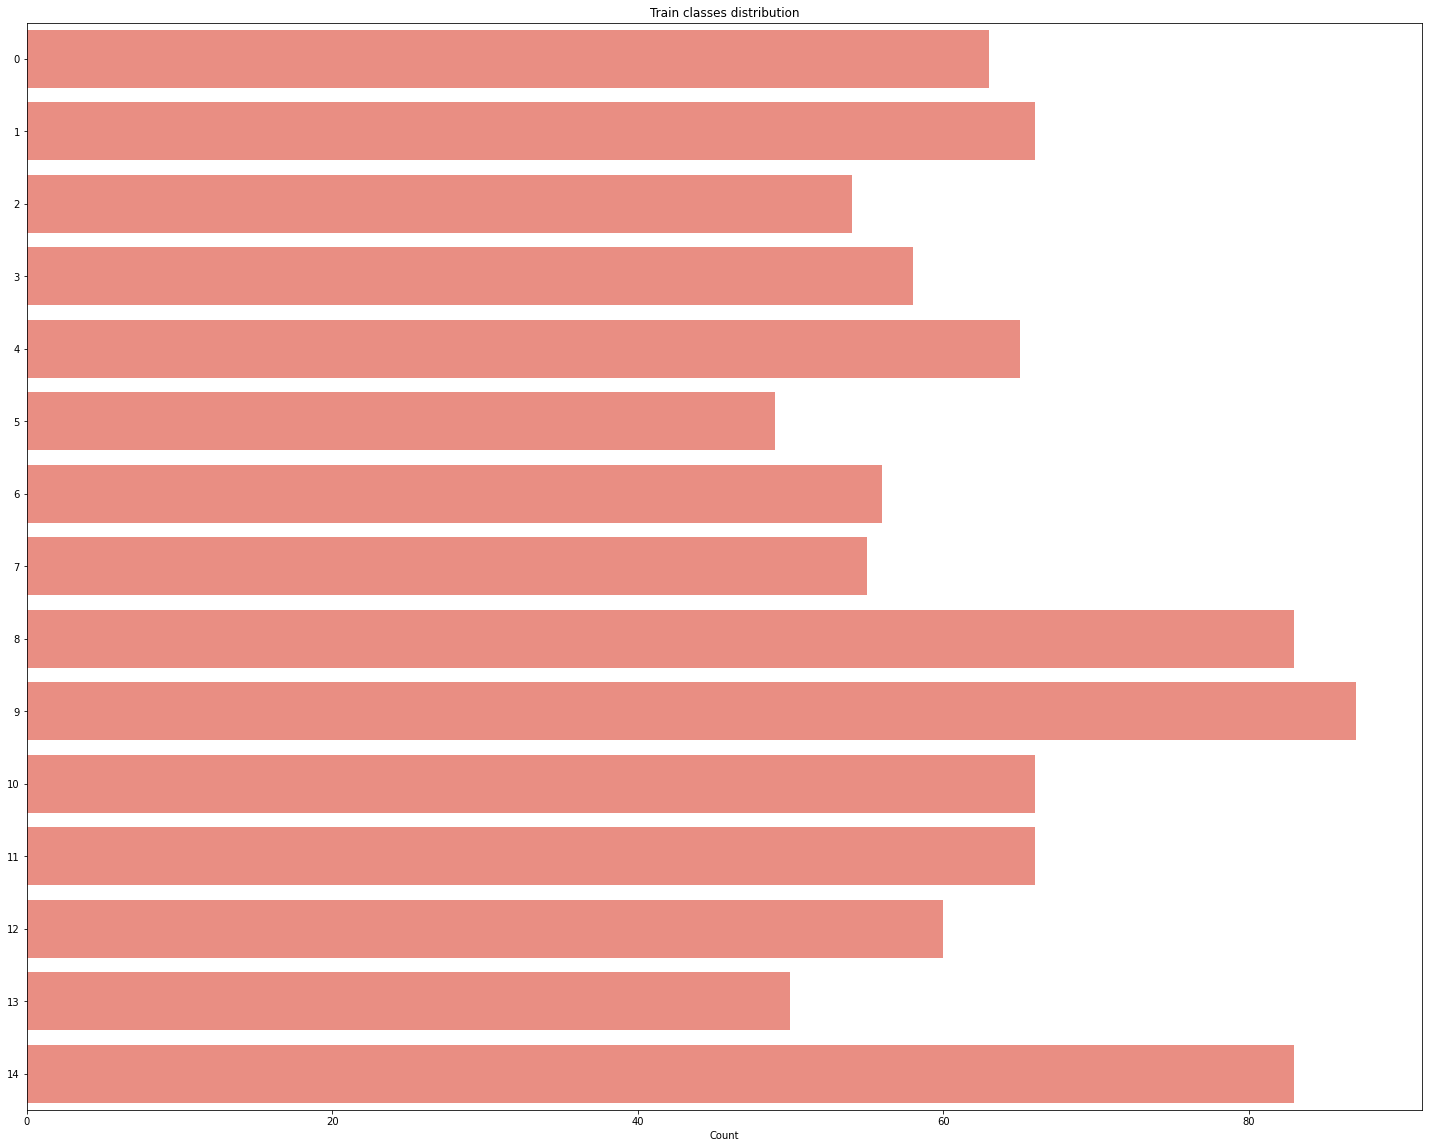

In [52]:
plt.figure(figsize=(25, 20))
plt.title('Train classes distribution')

sns.countplot(y=y_train, color="salmon")
plt.xlabel('Count')
plt.show()

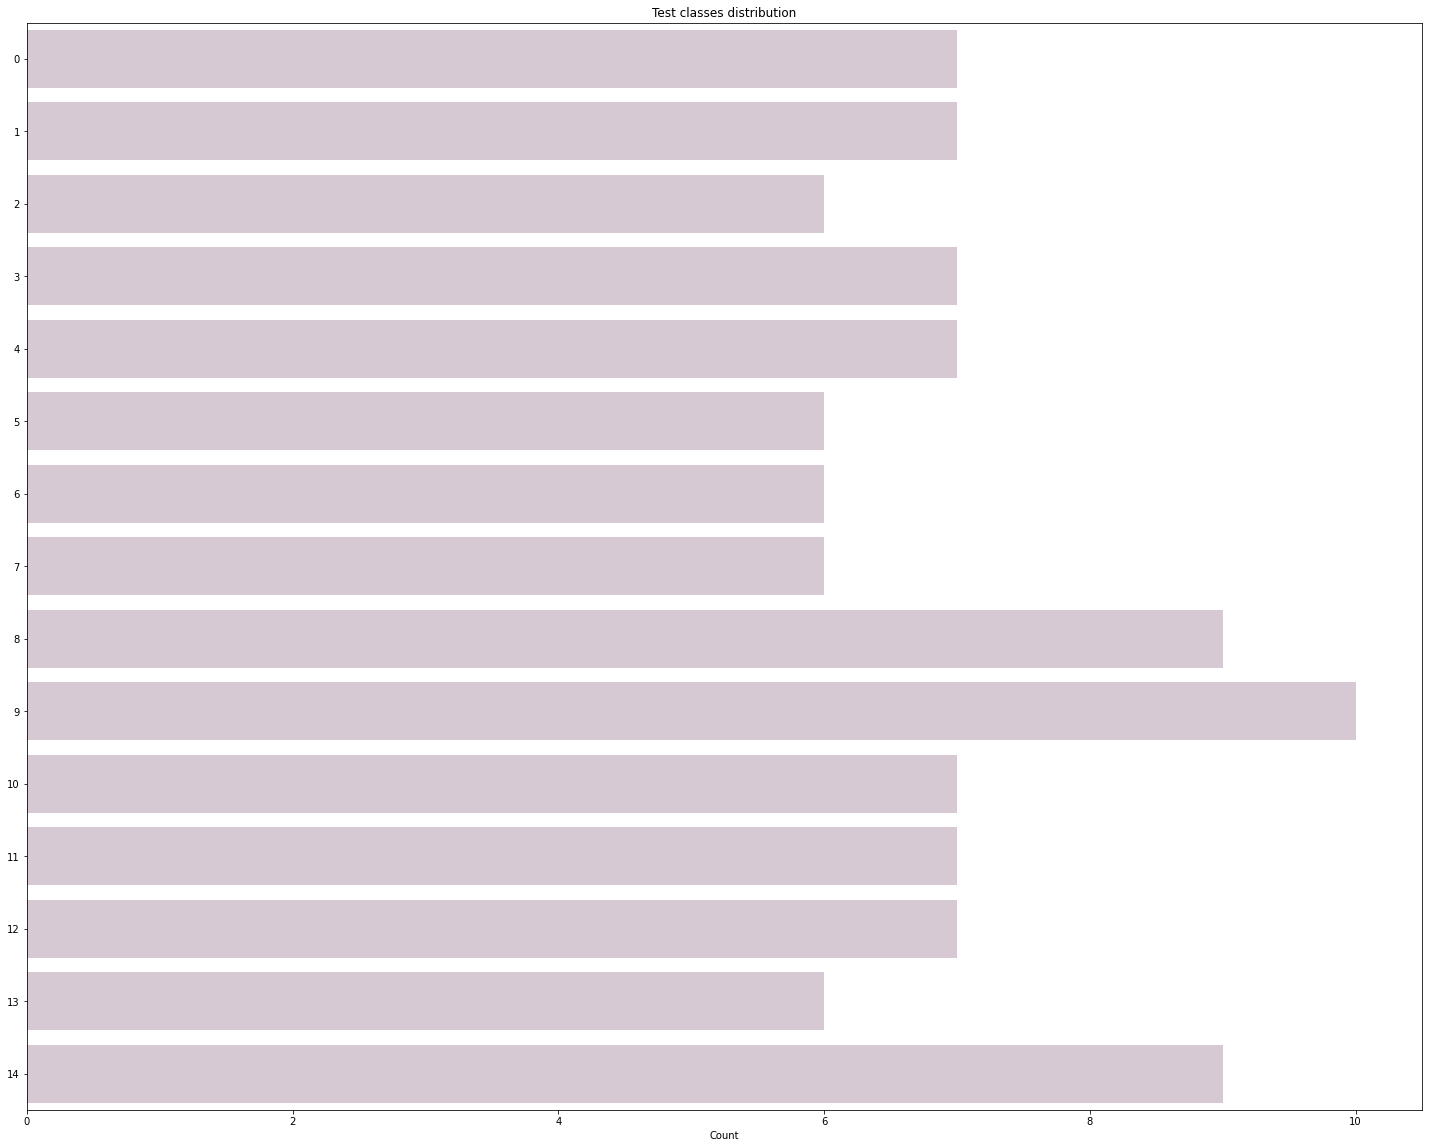

In [53]:
plt.figure(figsize=(25, 20))
plt.title('Test classes distribution')

sns.countplot(y=y_test, color='#D9C7D4')
plt.xlabel('Count')
plt.show()

# Building the model

In [66]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(15)
])

In [67]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [68]:
history = model.fit(
    x=X_train, 
    y=y_train, 
    epochs=100,
    validation_data=(X_test, y_test),
)

Epoch 1/100
31/31 [==============================] - 3s 44ms/step - loss: 140.5353 - accuracy: 0.0916 - val_loss: 65.7105 - val_accuracy: 0.0841
Epoch 2/100
31/31 [==============================] - 0s 12ms/step - loss: 39.4357 - accuracy: 0.1821 - val_loss: 31.7298 - val_accuracy: 0.2336
Epoch 3/100
31/31 [==============================] - 0s 10ms/step - loss: 21.8181 - accuracy: 0.2310 - val_loss: 30.5304 - val_accuracy: 0.2150
Epoch 4/100
31/31 [==============================] - 0s 9ms/step - loss: 23.8089 - accuracy: 0.2456 - val_loss: 15.7986 - val_accuracy: 0.2056
Epoch 5/100
31/31 [==============================] - 0s 9ms/step - loss: 13.5213 - accuracy: 0.3101 - val_loss: 8.3181 - val_accuracy: 0.3645
Epoch 6/100
31/31 [==============================] - 0s 9ms/step - loss: 5.2813 - accuracy: 0.4235 - val_loss: 8.5574 - val_accuracy: 0.3458
Epoch 7/100
31/31 [==============================] - 0s 9ms/step - loss: 6.8377 - accuracy: 0.4069 - val_loss: 5.3341 - val_accuracy: 0.4579


## Model Evaluation

### Model Accuracy

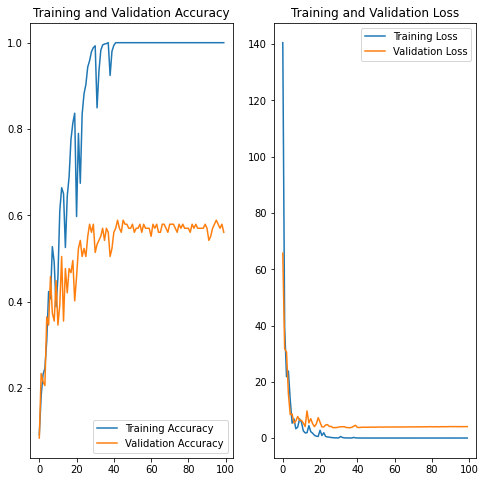

In [70]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [71]:
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=2)

train_acc_default = train_acc

print('\nTrain accuracy:', round(train_acc*100, 2), "%")

31/31 - 0s - loss: 0.0015 - accuracy: 1.0000 - 129ms/epoch - 4ms/step

Train accuracy: 100.0 %


In [72]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

test_acc_default = test_acc

print('\nTest accuracy:', round(test_acc*100, 2), "%")

4/4 - 0s - loss: 4.0609 - accuracy: 0.5607 - 34ms/epoch - 9ms/step

Test accuracy: 56.07 %


### Confusion Matrix

In [73]:
pred = model.predict(X_test)

4/4 [==============================] - 0s 5ms/step


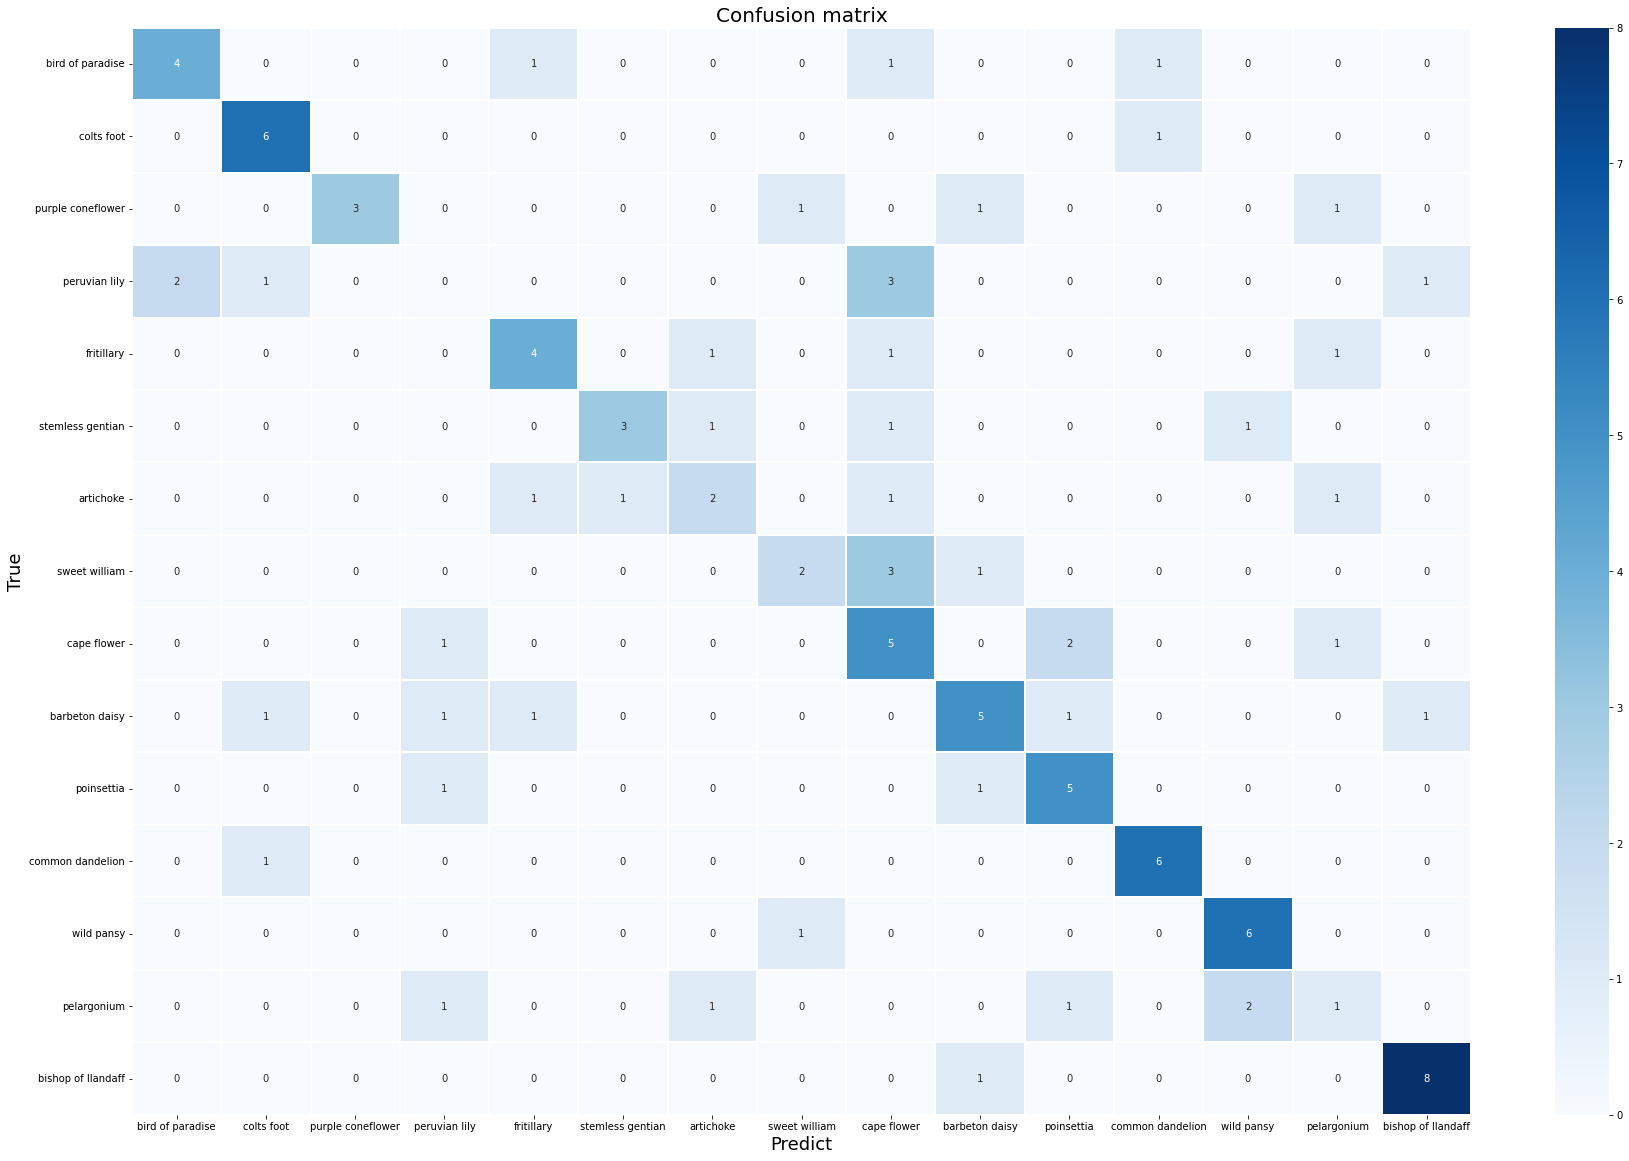

In [74]:
def highest_pred(matrix):
    return np.where(matrix == max(matrix))[0][0]
model_pred = list(map(highest_pred, pred))
confusion = confusion_matrix(y_test, model_pred)

plt.figure(figsize=(30,20))
sns.heatmap(confusion, 
            annot=True, 
            linewidths=1, 
            cmap='Blues', 
            fmt='g', 
            xticklabels=folderMap.values(), 
            yticklabels=folderMap.values())
plt.title("Confusion matrix", size=20)
plt.xlabel("Predict", size=18)
plt.ylabel("True", size=18)
plt.show()

In [85]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(X_test)

4/4 [==============================] - 0s 4ms/step


In [91]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(folderMap[predicted_label],
                                100*np.max(predictions_array),
                                folderMap[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(15))
  plt.yticks([])
  thisplot = plt.bar(range(15), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

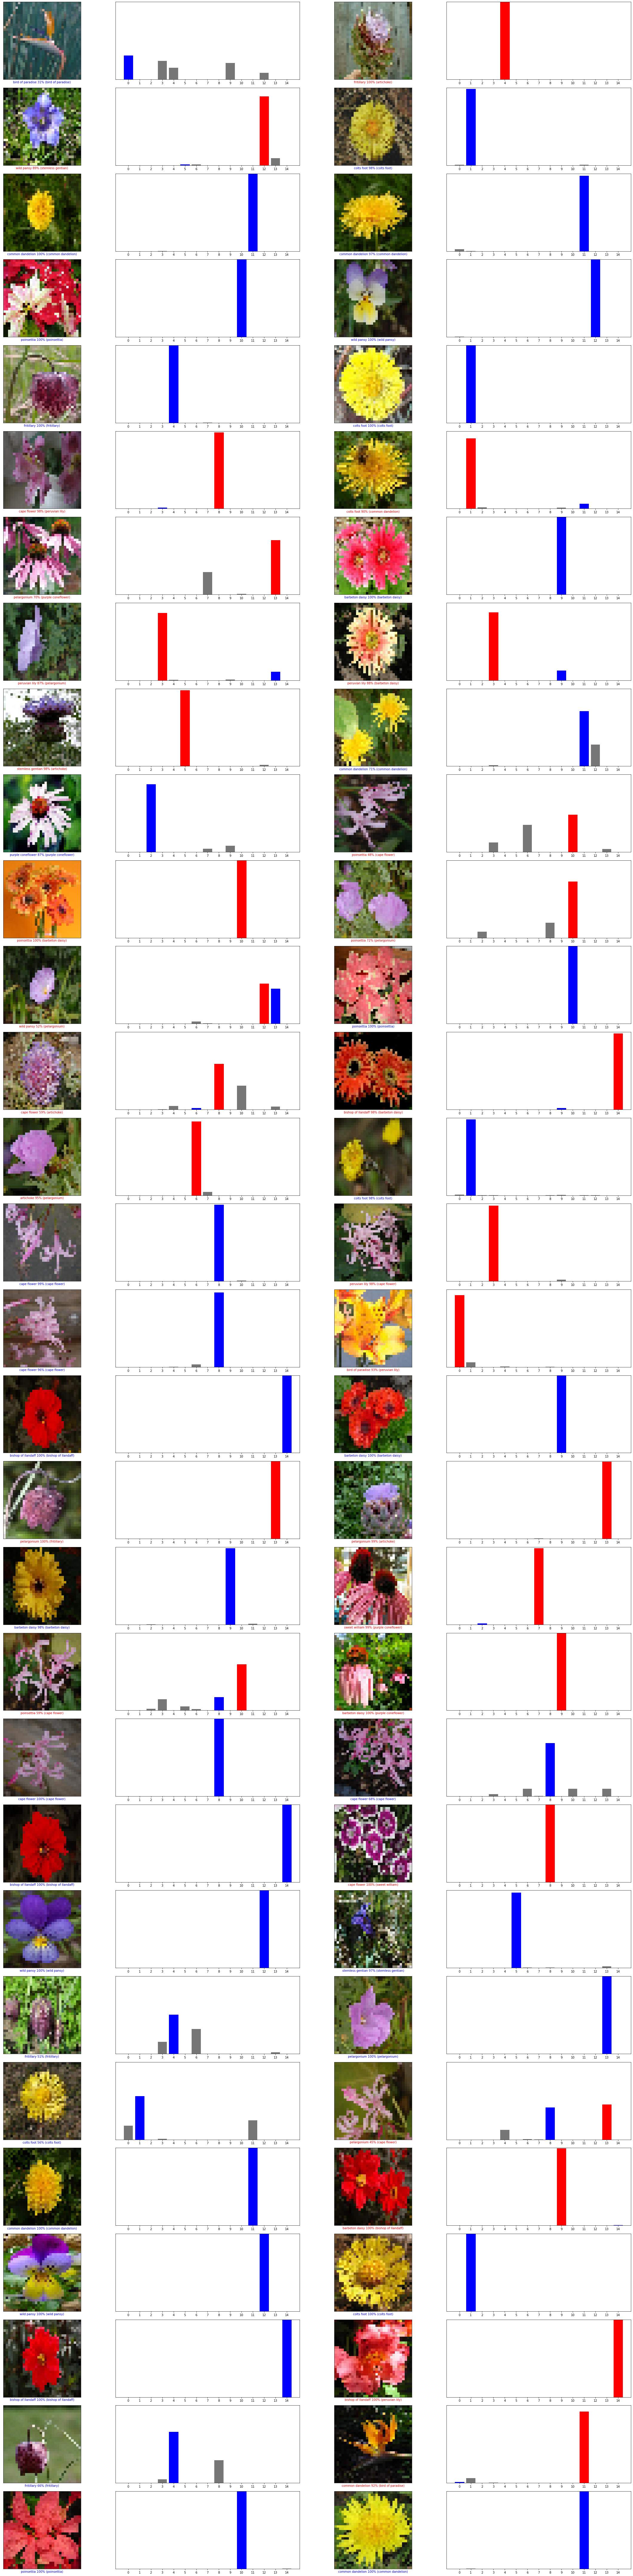

In [92]:
num_rows = 30
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(8*2*num_cols, 4*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i],  y_test)
plt.tight_layout()
plt.show()

In [ ]:
img_name = random.choice(os.listdir('/content/dataset/valid'))
img_path = '/content/dataset/valid/29/image_04103.jpg'

img = tf.keras.utils.load_img(
    img_path, target_size=(32, 32)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "{} most likely belongs to {} with a {:.2f} percent confidence."
    .format(img_name, flower_name(np.argmax(score)), 100 * np.max(score))
)

plt.figure(figsize=(2, 2))
plt.imshow((img_array[0].numpy()).astype('uint8'))
plt.title("{}:{:.2f}".format(flower_name(np.argmax(score)), 100 * np.max(score)))
plt.axis('off')